# IMDB MOVIE RATING PREDICTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Reading

In [2]:
imdb = pd.read_csv(r"C:\Users\sjyot\OneDrive\Desktop\Jyoti_Projects\imdb_top_1000.csv")

In [3]:
imdb

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


# Data Cleaning

In [4]:
imdb.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [5]:
imdb.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [6]:
for i in imdb.columns:
    print(i,':','\n',imdb[i].unique())

Poster_Link : 
 ['https://m.media-amazon.com/images/M/MV5BMDFkYTc0MGEtZmNhMC00ZDIzLWFmNTEtODM1ZmRlYWMwMWFmXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_UX67_CR0,0,67,98_AL_.jpg'
 'https://m.media-amazon.com/images/M/MV5BM2MyNjYxNmUtYTAwNi00MTYxLWJmNWYtYzZlODY3ZTk3OTFlXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UY98_CR1,0,67,98_AL_.jpg'
 'https://m.media-amazon.com/images/M/MV5BMTMxNTMwODM0NF5BMl5BanBnXkFtZTcwODAyMTk2Mw@@._V1_UX67_CR0,0,67,98_AL_.jpg'
 'https://m.media-amazon.com/images/M/MV5BMWMwMGQzZTItY2JlNC00OWZiLWIyMDctNDk2ZDQ2YjRjMWQ0XkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UY98_CR1,0,67,98_AL_.jpg'
 'https://m.media-amazon.com/images/M/MV5BMWU4N2FjNzYtNTVkNC00NzQ0LTg0MjAtYTJlMjFhNGUxZDFmXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg'
 'https://m.media-amazon.com/images/M/MV5BNzA5ZDNlZWMtM2NhNS00NDJjLTk4NDItYTRmY2EwMWZlMTY3XkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UX67_CR0,0,67,98_AL_.jpg'
 'https://m.media-amazon.com/images/M/MV5BNGNhMDIzZTUtNTBlZi00MTRlLWFjM2ItYzViMjE3YzI5MjljXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1

In [7]:
data = imdb.describe(include = 'all')

In [8]:
data

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
count,1000,1000,1000,899,1000,1000,1000.000000,1000,843.000000,1000,1000,1000,1000,1000,1.000000e+03,831
unique,1000,999,100,16,140,202,NaN,1000,NaN,548,660,841,891,939,NaN,823
top,https://m.media-amazon.com/images/M/MV5BMDFkYT...,Drishyam,2014,U,100 min,Drama,NaN,Two imprisoned men bond over a number of years...,NaN,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,NaN,"4,360,000"
freq,1,2,32,234,23,85,NaN,1,NaN,14,12,7,5,4,NaN,5
mean,NaN,NaN,NaN,NaN,NaN,NaN,7.949300,NaN,77.971530,NaN,NaN,NaN,NaN,NaN,2.736929e+05,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.275491,NaN,12.376099,NaN,NaN,NaN,NaN,NaN,3.273727e+05,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,7.600000,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,2.508800e+04,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.700000,NaN,70.000000,NaN,NaN,NaN,NaN,NaN,5.552625e+04,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,7.900000,NaN,79.000000,NaN,NaN,NaN,NaN,NaN,1.385485e+05,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,8.100000,NaN,87.000000,NaN,NaN,NaN,NaN,NaN,3.741612e+05,NaN


In [9]:
imdb.Certificate.replace(np.NaN,data['Certificate'][2],inplace = True)
imdb.Gross.replace(np.NaN,data['Gross'][2],inplace = True)
imdb.Meta_score.replace(np.NaN,data['Meta_score'][4],inplace = True)
imdb = imdb.drop(imdb[imdb['Released_Year'] == 'PG'].index)
imdb["Runtime"] = imdb["Runtime"].str.replace(' min', '')
imdb['Gross'] = imdb['Gross'].str.replace(',', '')

# Convert the column to integer
imdb["Runtime"] = imdb["Runtime"].astype(int)
imdb['Gross'] = imdb['Gross'].astype(int)

In [10]:
imdb['Released_Year'] = imdb['Released_Year'].astype(int)
imdb['Meta_score'] = imdb['Meta_score'].astype(int)

In [11]:
imdb=imdb.drop(['Overview','Poster_Link'], axis=1)
imdb

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,80,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175,"Crime, Drama",9.2,100,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,84,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,90,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,96,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115,"Comedy, Drama, Romance",7.6,76,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,4360000
996,Giant,1956,G,201,"Drama, Western",7.6,84,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,4360000
997,From Here to Eternity,1953,Passed,118,"Drama, Romance, War",7.6,85,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000
998,Lifeboat,1944,U,97,"Drama, War",7.6,78,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,4360000


In [12]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int32  
 2   Certificate    999 non-null    object 
 3   Runtime        999 non-null    int32  
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Meta_score     999 non-null    int32  
 7   Director       999 non-null    object 
 8   Star1          999 non-null    object 
 9   Star2          999 non-null    object 
 10  Star3          999 non-null    object 
 11  Star4          999 non-null    object 
 12  No_of_Votes    999 non-null    int64  
 13  Gross          999 non-null    int32  
dtypes: float64(1), int32(4), int64(1), object(8)
memory usage: 101.5+ KB


In [13]:
imdb.isnull().sum()

Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [20]:
imdb.to_csv(r"C:\Users\sjyot\OneDrive\Desktop\CTTC_Project\imdb.csv", index=False)

In [15]:
imdb.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,80,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175,"Crime, Drama",9.2,100,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,84,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,90,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,96,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


In [16]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int32  
 2   Certificate    999 non-null    object 
 3   Runtime        999 non-null    int32  
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Meta_score     999 non-null    int32  
 7   Director       999 non-null    object 
 8   Star1          999 non-null    object 
 9   Star2          999 non-null    object 
 10  Star3          999 non-null    object 
 11  Star4          999 non-null    object 
 12  No_of_Votes    999 non-null    int64  
 13  Gross          999 non-null    int32  
dtypes: float64(1), int32(4), int64(1), object(8)
memory usage: 101.5+ KB


# Data Visualization

C:\Users\sjyot\AppData\Local\Temp\ipykernel_6972\3171473453.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(imdb.IMDB_Rating)


<Axes: xlabel='IMDB_Rating', ylabel='Density'>

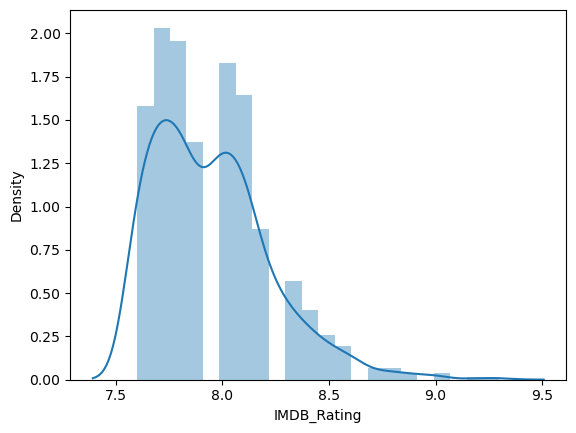

In [17]:
sns.distplot(imdb.IMDB_Rating)

C:\Users\sjyot\AppData\Local\Temp\ipykernel_6972\3125315415.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(imdb.Meta_score[imdb['IMDB_Rating']>=9.0],label='Meta_Score v/s IMDB',color='yellow')


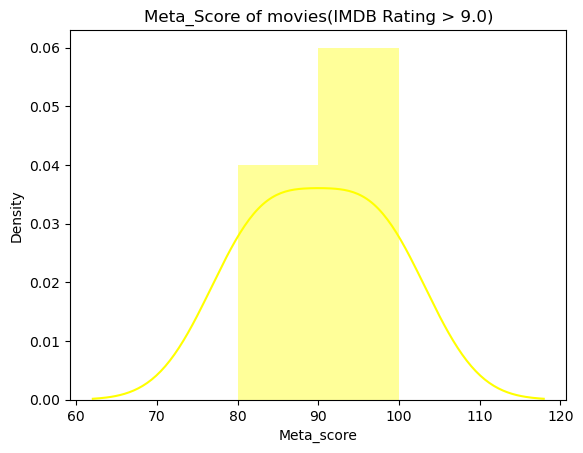

In [18]:
sns.distplot(imdb.Meta_score[imdb['IMDB_Rating']>=9.0],label='Meta_Score v/s IMDB',color='yellow')
plt.title('Meta_Score of movies(IMDB Rating > 9.0)')
plt.show()

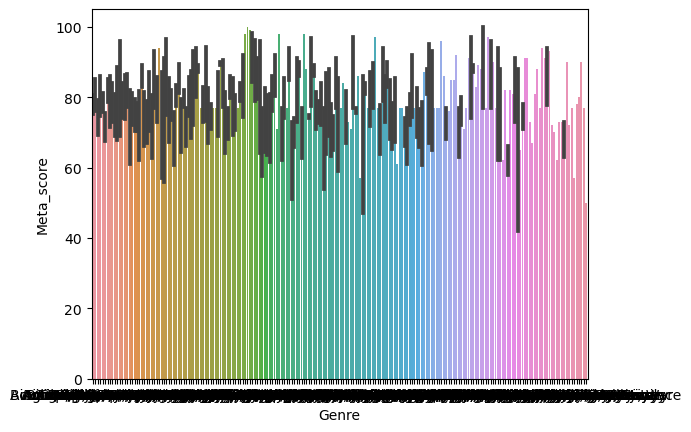

In [19]:
sns.barplot(y=imdb.Meta_score,x=imdb['Genre'])
plt.show()

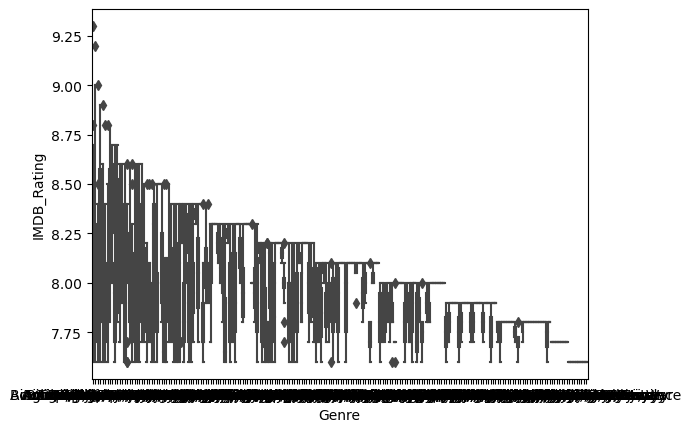

In [19]:
sns.boxplot(y=imdb.IMDB_Rating,x=imdb['Genre'])
plt.show()

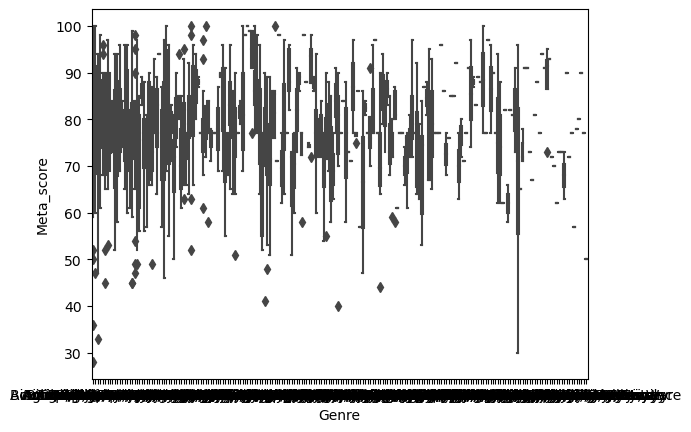

In [20]:
sns.boxplot(y=imdb.Meta_score,x=imdb['Genre'])
plt.show()

In [21]:
df = imdb[imdb['IMDB_Rating']>9.0]
df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,80,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175,"Crime, Drama",9.2,100,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411


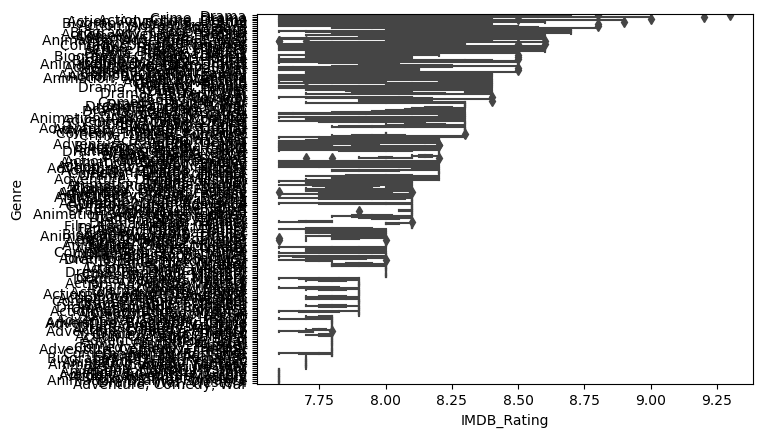

In [22]:
sns.boxplot(y=imdb['Genre'],x=imdb.IMDB_Rating)
plt.show()

In [23]:
genre_counts=imdb['Genre'].value_counts()

In [24]:
top_genres = genre_counts.nlargest(10).index

In [25]:
filtered_imdb_genre = imdb[imdb['Genre'].isin(top_genres)]

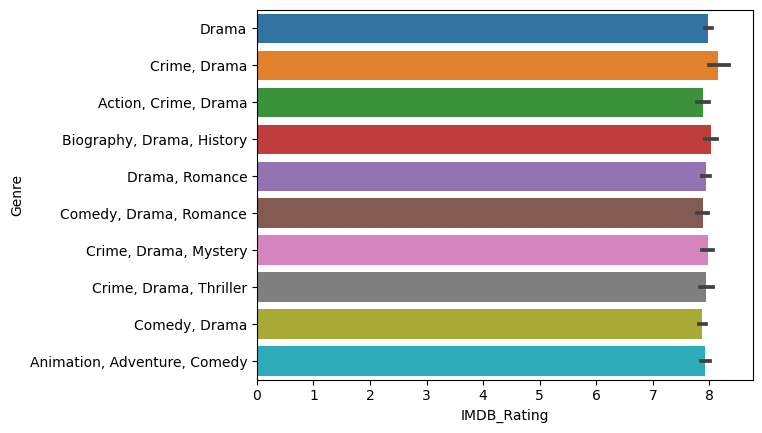

In [26]:
sns.barplot(y=filtered_imdb_genre['Genre'], x=filtered_imdb_genre['IMDB_Rating'])
plt.show()

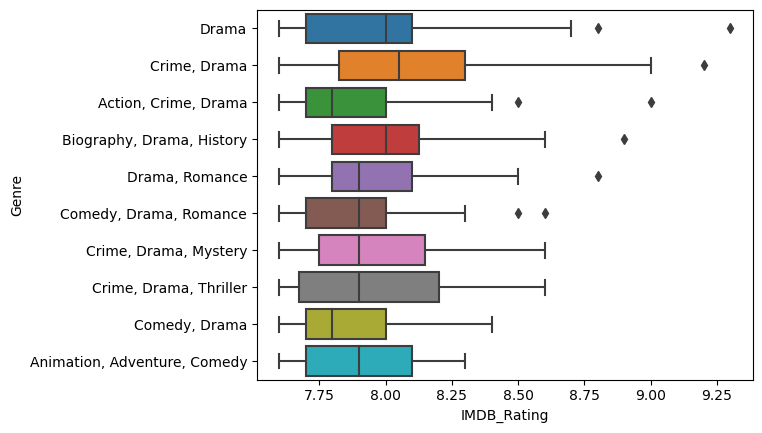

In [27]:
sns.boxplot(y=filtered_imdb_genre['Genre'], x=filtered_imdb_genre['IMDB_Rating'])
plt.show()

In [28]:
year_counts=imdb['Released_Year'].value_counts()
top_year = year_counts.nlargest(10).index
filtered_imdb_year = imdb[imdb['Released_Year'].isin(top_year)]

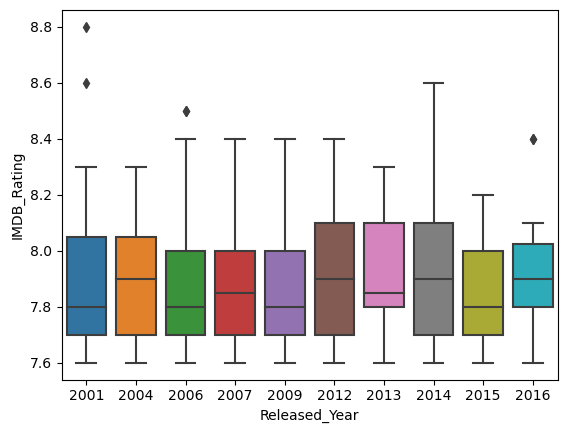

In [29]:
sns.boxplot(x=filtered_imdb_year['Released_Year'], y=filtered_imdb_year['IMDB_Rating'])
plt.show()

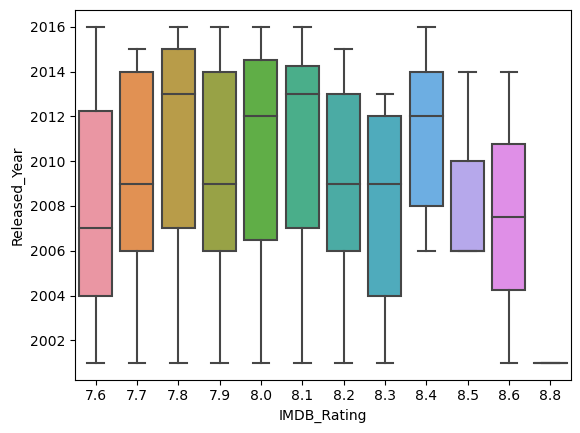

In [30]:
sns.boxplot(y=filtered_imdb_year['Released_Year'], x=filtered_imdb_year['IMDB_Rating'])
plt.show()

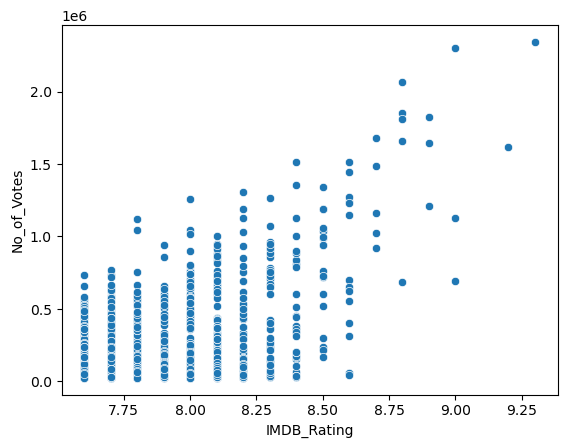

In [31]:
sns.scatterplot(x='IMDB_Rating',y='No_of_Votes',data = imdb)
plt.show()

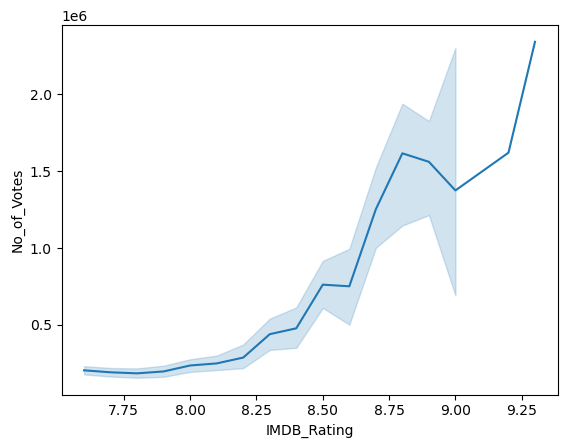

In [32]:
sns.lineplot(x='IMDB_Rating',y='No_of_Votes',data = imdb)
plt.show()

In [33]:
duration_counts=imdb['Runtime'].value_counts()
top_duration = duration_counts.nlargest(10).index
filtered_imdb_duration = imdb[imdb['Runtime'].isin(top_duration)]

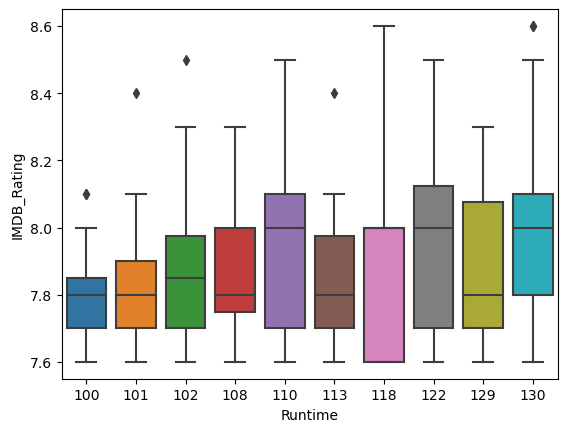

In [34]:
sns.boxplot(x=filtered_imdb_duration['Runtime'], y=filtered_imdb_duration['IMDB_Rating'])
plt.show()

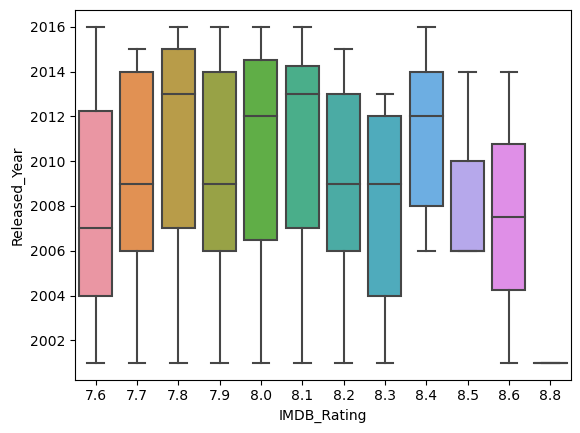

In [35]:
sns.boxplot(y=filtered_imdb_year['Released_Year'], x=filtered_imdb_year['IMDB_Rating'])
plt.show()

In [36]:
top = imdb[imdb['IMDB_Rating']>8.0]
top

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,80,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175,"Crime, Drama",9.2,100,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,84,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,90,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,96,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,La passion de Jeanne d'Arc,1928,Passed,110,"Biography, Drama, History",8.1,77,Carl Theodor Dreyer,Maria Falconetti,Eugene Silvain,André Berley,Maurice Schutz,47676,21877
318,The Circus,1928,Passed,72,"Comedy, Romance",8.1,90,Charles Chaplin,Charles Chaplin,Merna Kennedy,Al Ernest Garcia,Harry Crocker,30205,4360000
319,Sunrise: A Song of Two Humans,1927,Passed,94,"Drama, Romance",8.1,77,F.W. Murnau,George O'Brien,Janet Gaynor,Margaret Livingston,Bodil Rosing,46865,539540
320,The General,1926,Passed,67,"Action, Adventure, Comedy",8.1,77,Clyde Bruckman,Buster Keaton,Buster Keaton,Marion Mack,Glen Cavender,81156,1033895


In [37]:
for i in range(0,10):
    print(top['Series_Title'][i]+'--->'+top['Genre'][i]+'\n')

The Shawshank Redemption--->Drama

The Godfather--->Crime, Drama

The Dark Knight--->Action, Crime, Drama

The Godfather: Part II--->Crime, Drama

12 Angry Men--->Crime, Drama

The Lord of the Rings: The Return of the King--->Action, Adventure, Drama

Pulp Fiction--->Crime, Drama

Schindler's List--->Biography, Drama, History

Inception--->Action, Adventure, Sci-Fi

Fight Club--->Drama



In [38]:
Gross_counts=imdb['Gross'].value_counts()
top_Gross = Gross_counts.nlargest(10).index
filtered_imdb_Gross = imdb[imdb['Gross'].isin(top_Gross)]

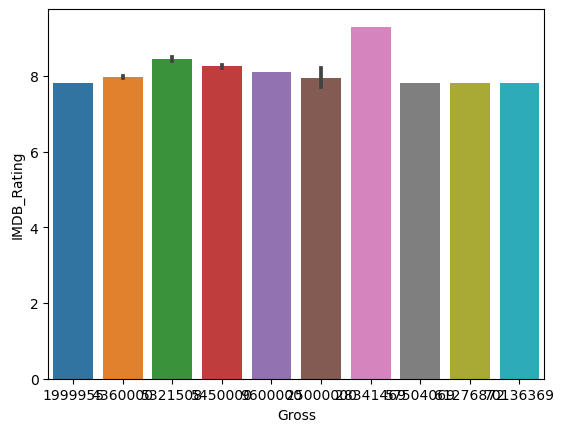

In [39]:
sns.barplot(x=filtered_imdb_Gross['Gross'], y=filtered_imdb_Gross['IMDB_Rating'])
plt.show()

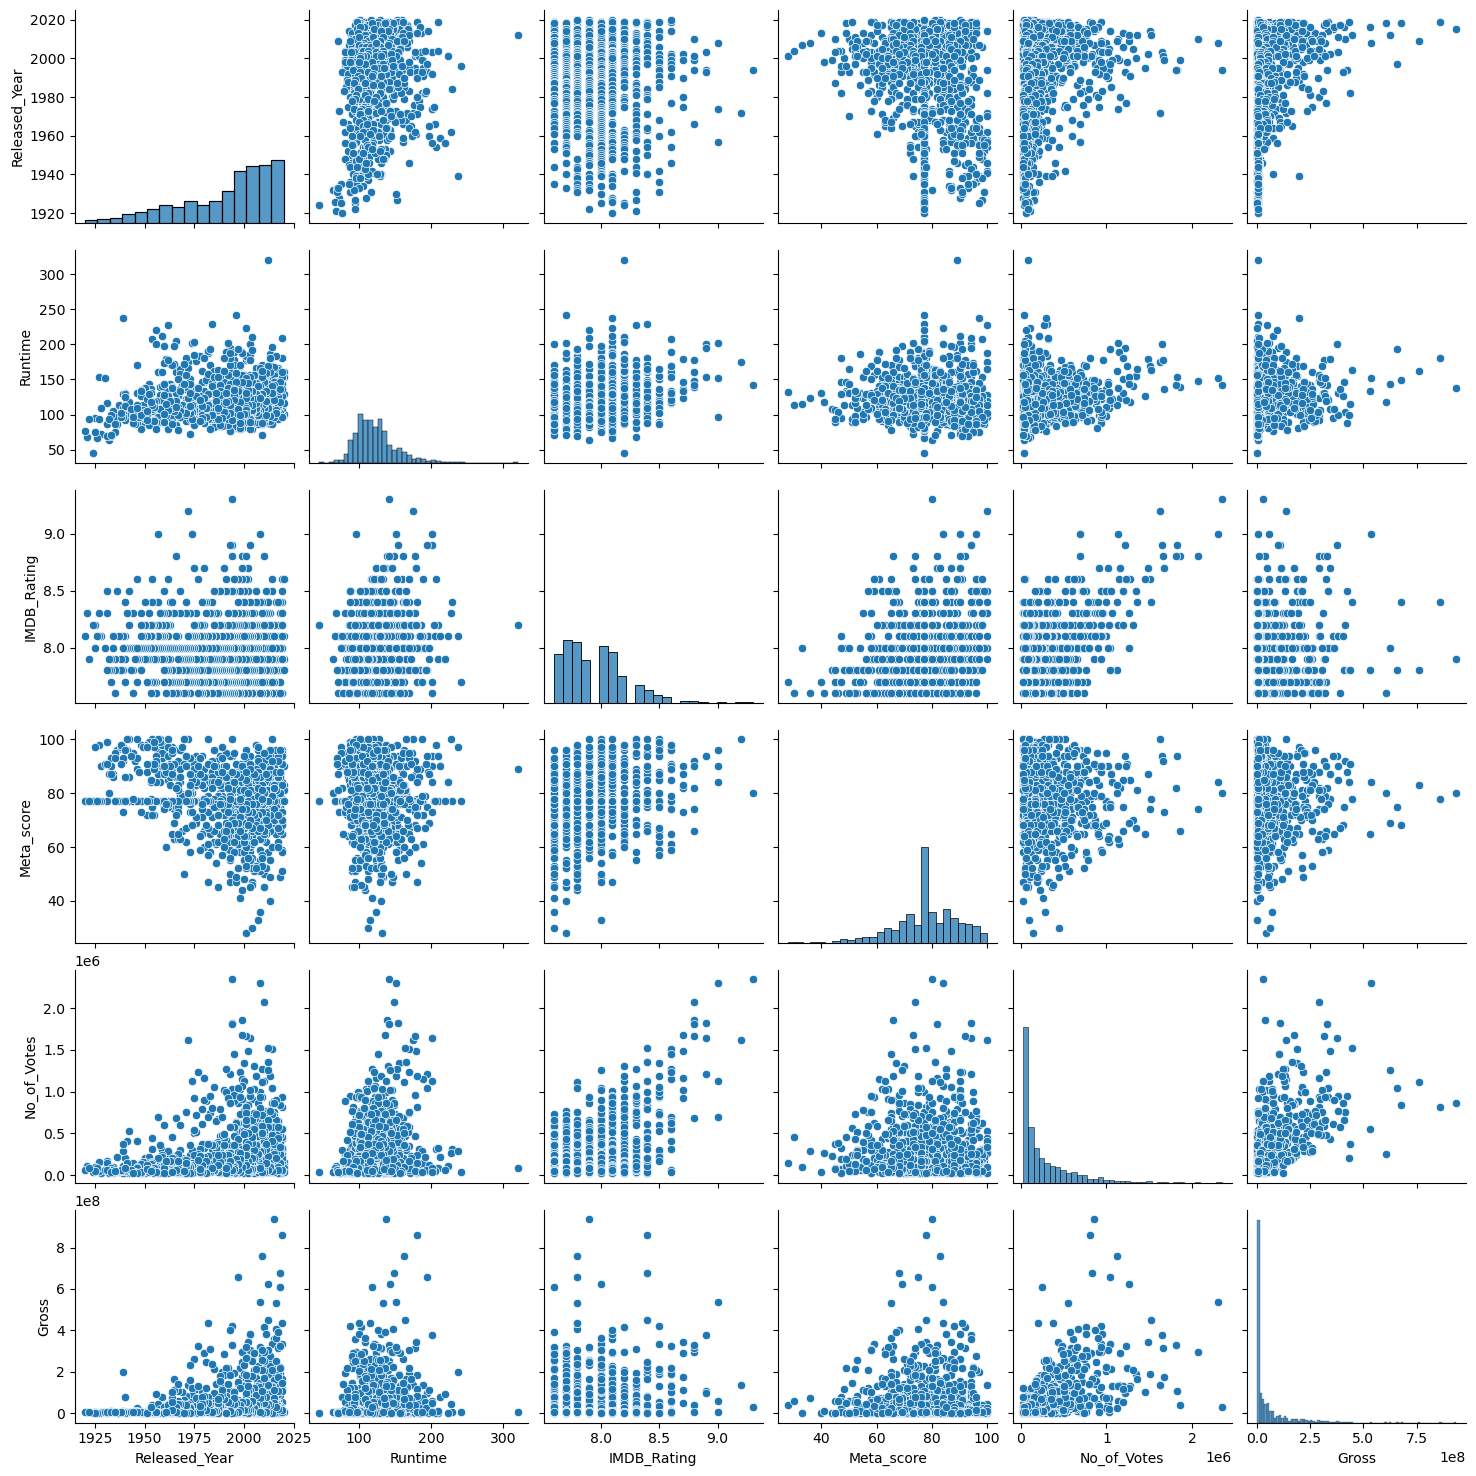

In [40]:
sns.pairplot(imdb)
plt.show()

In [41]:
corr = imdb.corr()

C:\Users\sjyot\AppData\Local\Temp\ipykernel_1344\4124446807.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = imdb.corr()


<Axes: >

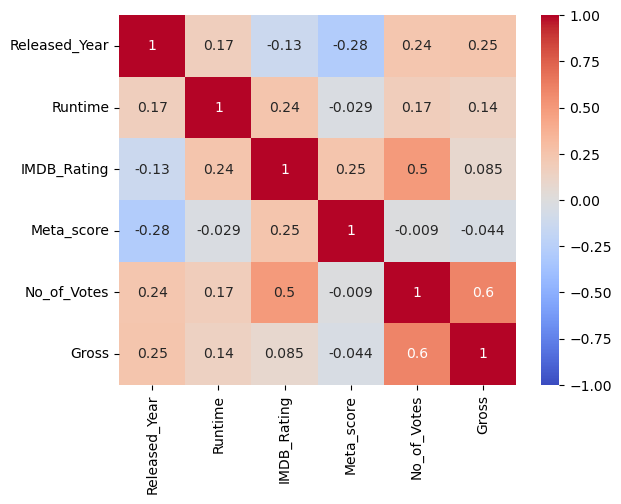

In [42]:
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

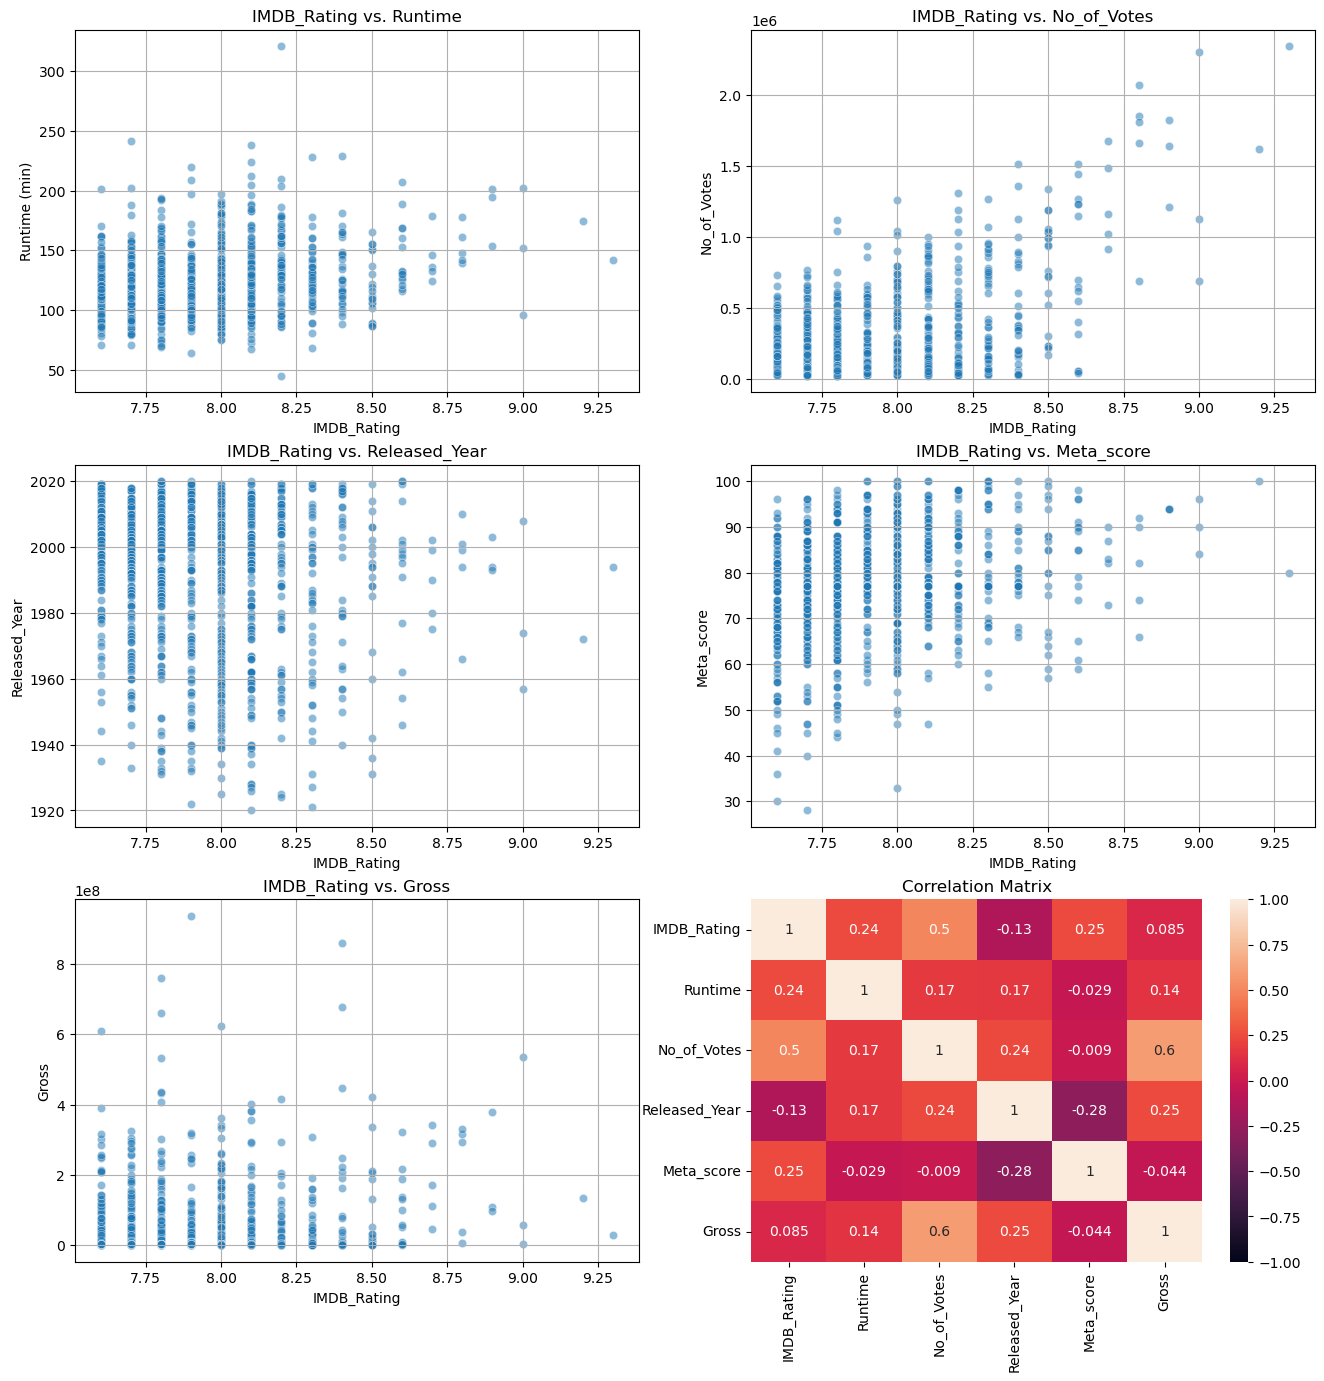

In [43]:
fig, axes = plt.subplots(3, 2, figsize=(16, 16))

# Duration vs. Rating
sns.scatterplot(x=imdb['IMDB_Rating'], y=imdb['Runtime'], alpha=0.5, ax=axes[0, 0])
axes[0, 0].set_title('IMDB_Rating vs. Runtime')
axes[0, 0].set_xlabel('IMDB_Rating')
axes[0, 0].set_ylabel('Runtime (min)')
axes[0, 0].grid(True)

# Votes vs. Rating
sns.scatterplot(x=imdb['IMDB_Rating'], y=imdb['No_of_Votes'], alpha=0.5, ax=axes[0, 1])
axes[0, 1].set_title('IMDB_Rating vs. No_of_Votes')
axes[0, 1].set_xlabel('IMDB_Rating')
axes[0, 1].set_ylabel('No_of_Votes')
axes[0, 1].grid(True)

# Year vs. Rating
sns.scatterplot(x=imdb['IMDB_Rating'], y=imdb['Released_Year'], alpha=0.5, ax=axes[1, 0])
axes[1, 0].set_title('IMDB_Rating vs. Released_Year')
axes[1, 0].set_xlabel('IMDB_Rating')
axes[1, 0].set_ylabel('Released_Year')
axes[1, 0].grid(True)

# Year vs. Rating
sns.scatterplot(x=imdb['IMDB_Rating'], y=imdb['Meta_score'], alpha=0.5, ax=axes[1, 1])
axes[1, 1].set_title('IMDB_Rating vs. Meta_score')
axes[1, 1].set_xlabel('IMDB_Rating')
axes[1, 1].set_ylabel('Meta_score')
axes[1, 1].grid(True)

# Year vs. Rating
sns.scatterplot(x=imdb['IMDB_Rating'], y=imdb['Gross'], alpha=0.5, ax=axes[2, 0])
axes[2, 0].set_title('IMDB_Rating vs. Gross')
axes[2, 0].set_xlabel('IMDB_Rating')
axes[2, 0].set_ylabel('Gross')
axes[2, 0].grid(True)

# Correlation matrix
numeric_features = imdb[['IMDB_Rating', 'Runtime', 'No_of_Votes', 'Released_Year', 'Meta_score', 'Gross']]
correlation_matrix = numeric_features.corr()
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, ax=axes[2, 1])
axes[2, 1].set_title('Correlation Matrix')

plt.show()

# Prediction

In [44]:
from sklearn.preprocessing import LabelEncoder
lae = LabelEncoder()

In [45]:
imdb.dtypes

Series_Title      object
Released_Year      int32
Certificate       object
Runtime            int32
Genre             object
IMDB_Rating      float64
Meta_score         int32
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross              int32
dtype: object

In [46]:
imdb.Series_Title = lae.fit_transform(imdb.Series_Title)
imdb.Certificate = lae.fit_transform(imdb.Certificate)
imdb.Genre = lae.fit_transform(imdb.Genre)
imdb.Director = lae.fit_transform(imdb.Director)
imdb.Star1 = lae.fit_transform(imdb.Star1)
imdb.Star2 = lae.fit_transform(imdb.Star2)
imdb.Star3 = lae.fit_transform(imdb.Star3)
imdb.Star4 = lae.fit_transform(imdb.Star4)
imdb.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,874,1994,1,142,137,9.3,80,141,599,567,89,911,2343110,28341469
1,785,1972,1,175,122,9.2,100,137,417,9,336,194,1620367,134966411
2,765,2008,14,152,22,9.0,84,83,128,282,1,619,2303232,534858444
3,786,1974,1,202,122,9.0,90,137,9,656,704,194,1129952,57300000
4,1,1957,12,96,122,9.0,96,456,252,463,535,420,689845,4360000


In [47]:
# input Output creation

In [48]:
ip = imdb.drop(['IMDB_Rating'],axis = 1)
op = imdb.IMDB_Rating

In [49]:
ip

,Series_Title,Released_Year,Certificate,Runtime,Genre,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,874,1994,1,142,137,80,141,599,567,89,911,2343110,28341469
1,785,1972,1,175,122,100,137,417,9,336,194,1620367,134966411
2,765,2008,14,152,22,84,83,128,282,1,619,2303232,534858444
3,786,1974,1,202,122,90,137,9,656,704,194,1129952,57300000
4,1,1957,12,96,122,96,456,252,463,535,420,689845,4360000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,130,1961,1,115,105,76,50,50,259,633,114,166544,4360000
996,297,1956,3,201,184,84,164,185,667,337,134,34075,4360000
997,285,1953,7,118,175,85,145,96,565,185,212,43374,30500000
998,480,1944,12,97,182,78,22,588,391,867,907,26471,4360000


In [50]:
op

0      9.3
1      9.2
2      9.0
3      9.0
4      9.0
      ... 
995    7.6
996    7.6
997    7.6
998    7.6
999    7.6
Name: IMDB_Rating, Length: 999, dtype: float64

In [74]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ip,op,train_size = 0.8)

In [75]:
x_train

,Series_Title,Released_Year,Certificate,Runtime,Genre,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
883,298,2017,6,101,137,60,305,121,526,499,672,99643,24801212
292,251,1962,12,95,142,77,296,565,320,220,448,29682,4360000
999,737,1935,12,86,135,93,22,515,486,510,293,51853,4360000
716,132,1935,12,75,160,95,213,77,199,152,881,43542,4360000
634,670,2005,6,119,11,74,262,460,263,129,15,283310,25514517
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,793,1940,7,125,107,77,74,111,620,332,729,203150,288475
712,673,1943,5,108,191,94,22,593,407,513,327,59556,4360000
296,388,1962,12,95,182,77,25,178,585,845,254,31728,4360000
965,757,1995,1,135,172,69,84,135,534,44,884,73172,71516617


In [76]:
y_train

883    7.6
292    8.1
999    7.6
716    7.8
634    7.8
      ... 
83     8.4
712    7.8
296    8.1
965    7.6
258    8.1
Name: IMDB_Rating, Length: 799, dtype: float64

In [77]:
x_test

,Series_Title,Released_Year,Certificate,Runtime,Genre,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
811,616,1996,1,129,129,47,170,506,455,210,427,189716,56116183
308,970,1949,12,114,22,77,398,278,802,207,573,29807,4360000
524,247,1990,12,105,147,74,495,327,818,194,52,447368,56362352
947,338,2001,12,152,55,64,78,148,679,692,564,658185,317575550
347,798,2011,14,146,137,62,479,195,800,615,113,428521,169708112
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,769,1978,1,183,182,86,328,514,132,391,434,311361,48979328
571,702,2019,8,120,162,81,96,511,598,643,523,27187,4360000
325,86,2015,14,163,2,77,267,537,281,600,473,72245,8178001
457,792,1940,7,129,152,96,237,252,334,390,146,85559,55000


In [78]:
from sklearn.linear_model import LinearRegression
le = LinearRegression()

In [79]:
le.fit(x_train,y_train)

LinearRegression()

In [80]:
y_pred=le.predict(x_test)

In [81]:
from sklearn.metrics import r2_score,mean_squared_error
r2 = r2_score(y_pred,y_test)
mse = mean_squared_error(y_pred,y_test)
print(r2,mse)

-0.04350105619264144 0.03570446099811235


In [59]:
y_test.shape

(300,)